In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [0]:
!mkdir .kaggle

In [0]:
!cp kaggle.json .kaggle

In [0]:
!mv .kaggle /root/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

 99% 269M/271M [00:02<00:00, 131MB/s]
100% 271M/271M [00:02<00:00, 117MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 86.8MB/s]
 99% 540M/543M [00:04<00:00, 157MB/s]
100% 543M/543M [00:04<00:00, 141MB/s]


In [0]:
import zipfile
zip = zipfile.ZipFile('train.zip','r')
zip.extractall()

In [0]:
import os
filenames = os.listdir('train')

In [0]:
filenames[:5]

['cat.11442.jpg',
 'cat.6490.jpg',
 'dog.6664.jpg',
 'cat.3782.jpg',
 'cat.637.jpg']

In [0]:
catogiries = []
for filename in filenames:
  if filename.split('.')[0] == 'cat': catogiries.append('0')
  elif filename.split('.')[0] == 'dog': catogiries.append('1')

In [0]:
import pandas
train = pandas.DataFrame({'File Name':filenames, 
                          'Category':catogiries})

In [0]:
train.head(10)

,File Name,Category
0,cat.11442.jpg,0
1,cat.6490.jpg,0
2,dog.6664.jpg,1
3,cat.3782.jpg,0
4,cat.637.jpg,0
5,dog.3602.jpg,1
6,cat.10180.jpg,0
7,dog.11720.jpg,1
8,cat.3632.jpg,0
9,dog.3761.jpg,1


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),activation= 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation= 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['acc'])

In [0]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(train.iloc[:2500],test_size = 0.2, random_state = 42)

In [0]:
train_data.reset_index(drop=True)
valid_data.reset_index(drop=True)

,File Name,Category
0,dog.11071.jpg,1
1,dog.8322.jpg,1
2,cat.11770.jpg,0
3,cat.5707.jpg,0
4,dog.10878.jpg,1
...,...,...
495,dog.6241.jpg,1
496,dog.4599.jpg,1
497,cat.8945.jpg,0
498,cat.3092.jpg,0


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_dataframe(train_data, 'train/',x_col = 'File Name', y_col = 'Category', target_size = (150,150), batch_size = 20, class_mode = 'binary')
generator = train_datagen.flow_from_dataframe(train_data, 'train/',x_col = 'File Name', y_col = 'Category', target_size = (150,150), batch_size = 20, class_mode = 'categorical')

Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


In [0]:
generator.next()

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = test_datagen.flow_from_dataframe(valid_data,'train/',x_col='File Name', y_col = 'Category', target_size = (150,150), batch_size = 20,class_mode = 'binary')

Found 500 validated image filenames belonging to 2 classes.


In [0]:
train.shape, train_data.shape, valid_data.shape

((25000, 2), (2000, 2), (500, 2))

In [0]:
train_data.Category.shape

(2000,)

In [0]:
history = model.fit_generator(train_generator, epochs = 10, steps_per_epoch=100, validation_data=valid_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 107s 1s/step - loss: 0.6048 - acc: 0.6940 - val_loss: 0.5895 - val_acc: 0.6920
Epoch 2/10
100/100 [==============================] - 106s 1s/step - loss: 0.5385 - acc: 0.7350 - val_loss: 0.6022 - val_acc: 0.6800
Epoch 3/10
100/100 [==============================] - 106s 1s/step - loss: 0.5123 - acc: 0.7550 - val_loss: 0.5448 - val_acc: 0.7340
Epoch 4/10
100/100 [==============================] - 106s 1s/step - loss: 0.4679 - acc: 0.7775 - val_loss: 0.5341 - val_acc: 0.7400
Epoch 5/10
100/100 [==============================] - 107s 1s/step - loss: 0.4182 - acc: 0.8025 - val_loss: 0.7435 - val_acc: 0.7180
Epoch 6/10
100/100 [==============================] - 106s 1s/step - loss: 0.3846 - acc: 0.8290 - val_loss: 0.6626 - val_acc: 0.7120
Epoch 7/10
100/100 [==============================] - 108s 1s/step - loss: 0.2957 - acc: 0.8800 - val_loss: 0.6434 - val_acc: 0.7440
Epoch 8/10
100/100 [==============================] - 108s 1s/step - 

In [0]:
history.history

{'acc': [0.694,
  0.735,
  0.755,
  0.7775,
  0.8025,
  0.829,
  0.88,
  0.902,
  0.929,
  0.943],
 'loss': [0.6047896870970726,
  0.5384573778510093,
  0.5122628858685494,
  0.46792157664895057,
  0.41820539712905885,
  0.3846040679514408,
  0.2957151842862368,
  0.23847248895093798,
  0.1906034460105002,
  0.1570982608385384],
 'val_acc': [0.692, 0.68, 0.734, 0.74, 0.718, 0.712, 0.744, 0.75, 0.71, 0.748],
 'val_loss': [0.5894771057367325,
  0.6021558213233947,
  0.5447690683603287,
  0.5340589296817779,
  0.7434832364320755,
  0.662553243637085,
  0.6434231245517731,
  0.7894899493455887,
  1.4250065910816192,
  0.9961918732523918]}

No handles with labels found to put in legend.


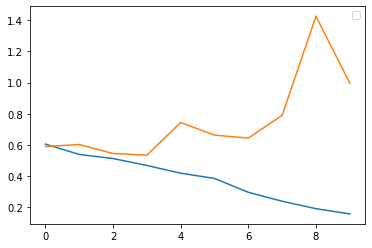

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

In [0]:
!mkdir models

In [0]:
model.save('models/dogs_cats1.h5')